In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [17]:
frequency = 440
period = 1 / frequency
sample_rate = 48000
discrete_period = int(period * sample_rate)
duration = 1
total_size = int(duration * sample_rate)
data = np.zeros((total_size), dtype=np.float32)
for i in range(int(duration / period)):
    t = np.arange(discrete_period) / sample_rate 
    data[i * discrete_period:(i + 1) * discrete_period] = np.sinc(sample_rate * t / period)

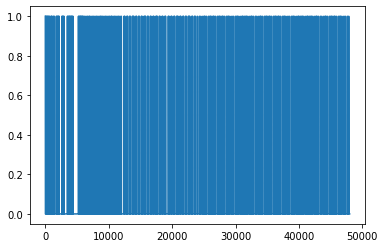

In [18]:
plt.plot(data)

In [34]:
import soundfile as sf

In [73]:
sf.write('blit_test.wav', waveform, sample_rate)

107.0 109.0909090909091


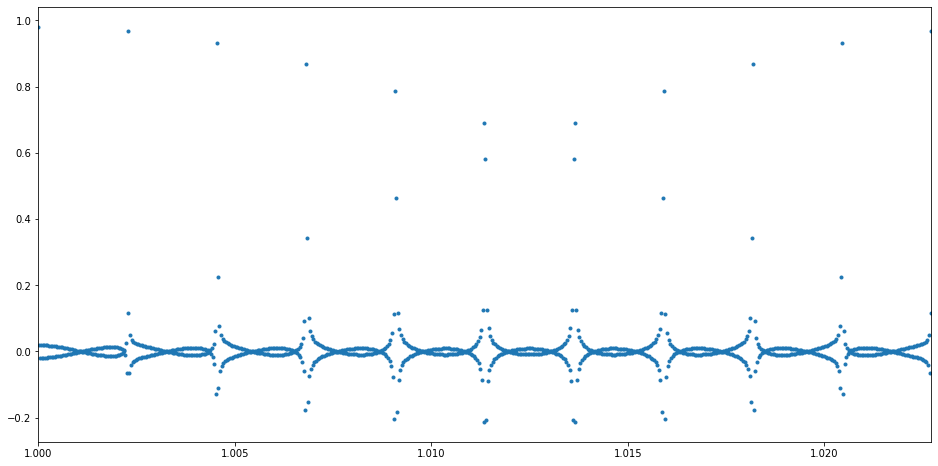

In [72]:
def SincM(x, M):
    sincm = lambda x: np.sin(np.pi*x) / (M * np.sin(np.pi*x / M))
    return np.where( abs(np.sin(np.pi*x/M)) <= 1.0e-12, 1, sincm(x) )

sample_rate = 48000
time = np.linspace(1, 2, sample_rate + 1)

waveform = np.zeros_like(time)

for freq, amp in {440:1}.items():
    P = sample_rate / freq
    M = 2 * (P//2) - 1
    waveform += amp * (M/P)*SincM((M/P) * (time * sample_rate), M)
    print(M, P)

plt.figure(figsize=(16, 8))
plt.plot(time, waveform, '.')
plt.xlim(1, 1 + 5/220)
#plt.ylim(-.2, .2)

plt.show()

In [11]:
print(time * sample_rate)

[48000. 48001. 48002. ... 95998. 95999. 96000.]
